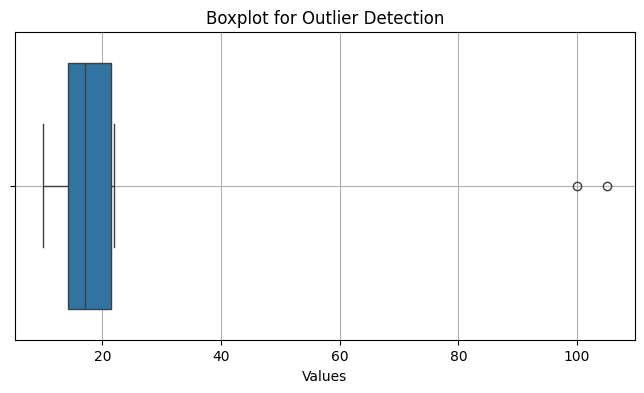

Z-score outliers: []
IQR outliers: [np.int64(100), np.int64(105)]


In [1]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_combined(data):
    data = np.array(data)
    
    # --- Z-Score Method ---
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    z_outliers = data[np.abs(z_scores) > 3]

    # --- IQR Method ---
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = data[(data < lower_bound) | (data > upper_bound)]

    # --- Boxplot Visualization ---
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data)
    plt.title("Boxplot for Outlier Detection")
    plt.xlabel("Values")
    plt.grid(True)
    plt.show()

    # --- Output ---
    print(f"Z-score outliers: {sorted(set(z_outliers))}")
    print(f"IQR outliers: {sorted(set(iqr_outliers))}")
    return {
        "Z-score": list(sorted(set(z_outliers))),
        "IQR": list(sorted(set(iqr_outliers)))
    }

# Example usage
data = [10, 12, 14, 15, 16, 18, 20, 22, 100, 105]
outliers = detect_outliers_combined(data)


